In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('911.csv')
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


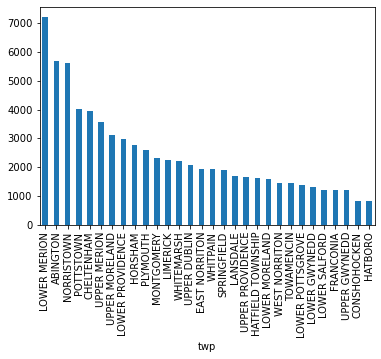

In [23]:
# 어느 도시에서 몇 건의 사건이 발생했는지 상위 10개 도시의 발생 건수를 bar chart로 표현..
df.groupby('twp')['zip'].count().sort_values(ascending=False)[:30].plot(kind = 'bar')

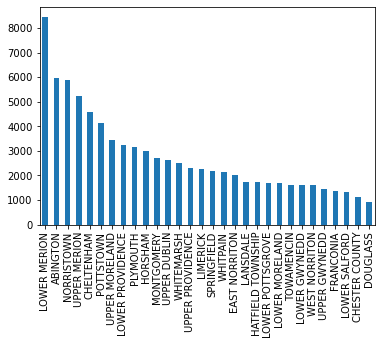

In [24]:
df['twp'].value_counts().head(30).plot(kind = 'bar')

In [30]:
# title columns에서 각각의 사고유형의 갯수를 bar chart로 표시하시오..
# 1. 사고유형 추출
# 2. 사고유형별 건수
# 3. 차트

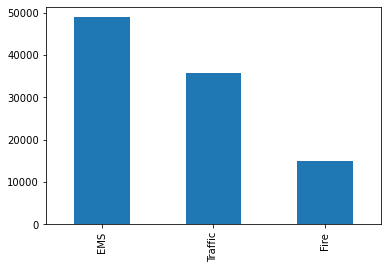

In [36]:
df['title'].apply(lambda x : x.split(':')[0]).value_counts().plot(kind='bar')

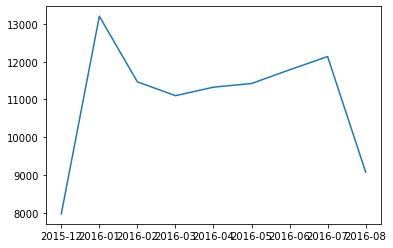

In [63]:
# 월별 사건 발생 추이를 line chart로 나타내시오..
df['month'] = df['timeStamp'].apply(lambda x : x[0:7]).value_counts().sort_index().plot(kind='line')

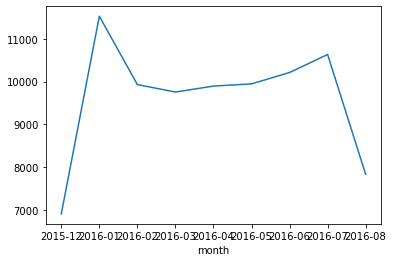

In [81]:
df['month'] = df['timeStamp'].apply(lambda x : x[0:7])
df.groupby('month')['zip'].count().plot()

In [82]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12


In [85]:
# 각 월에 어느 사건유형 몇건 발생했는지 월별 사건 유형 발생 빈도를 출력하세요...
# 그리고 table로 만들어서 heatmap으로 시각화 하시오
df['kind'] = df['title'].apply(lambda x : x.split(':')[0])

In [86]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,month,kind
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12,EMS


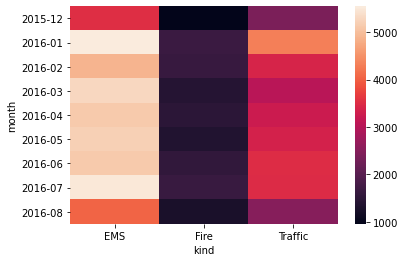

In [92]:
dt = df.groupby(['month', 'kind'])['zip'].count().unstack()
sns.heatmap(dt)